# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# Since the goal is to iterate through some random triples, a quick search is constructed below
import random
import numpy

def find_some_different_people( sample_list, sample_count, num_tries ):
    best_list = range(sample_count)
    best_var = 0    
    for k in xrange(num_tries):
        sample_indices = random.sample(sample_list, sample_count)
        samples = pd.DataFrame(data.loc[sample_indices], columns = data.keys()).reset_index(drop = True)
        variance = 0
        for f in xrange(samples.shape[1]):
            variance = variance + numpy.var(samples.iloc[:,f])
        if variance > best_var:
            best_var = variance
            best_list = sample_indices
    return best_list



In [4]:
# Select three indices of your choice you wish to sample from the dataset
nrow = data.shape[0]
sample_list = range(0, nrow - 1)
num_tries = 500
sample_count = 3

indices = find_some_different_people(sample_list,sample_count,num_tries)
print indices


[85, 26, 288]


In [28]:
# It was determined that 181, 65, and 395 provided a good variance (random sampling may change above results)
indices = [181, 65, 395]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,112151,29627,18148,16745,4948,8550
1,85,20959,45828,36,24231,1423
2,9602,1316,1263,2921,841,290


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

In [6]:
# Show percentile of each customer, with product category
data.rank(pct=True).loc[indices]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
181,1.000000,0.984091,0.893182,0.984091,0.811364,0.990909
65,0.015909,0.961364,0.990909,0.006818,0.993182,0.656818
395,0.550000,0.209091,0.088636,0.695455,0.515909,0.169318


**Answer:**

As a prelim, some of the categories are slightly vague, e.g., "grocery" is standard American vernacular for all supermarket-like items, which unfortunately encompass the five other categories. It is likely that because this is a Portuguese dataset, something was lost in translation. Since this project will critically examine the classification according to these fields, the following definitions are provided:
- Delicatessen: inclusive of all products available from a standard deli - meats, breads, cheeses (sliced), salads, and other small sides.
- Detergents/Paper: all cleaning products, e.g., soaps, sprays, dishwashing liquid, and paper products, e.g., paper towels, paper napkins, toilet paper.
- Frozen: all items available from a standard frozen section, e.g., wafflees, vegetables, individual meals, ice cream.
- Milk: cheese, eggs, yogurt, butter, cream.
- Fresh: produce, e.g., fruits and vegetables
- Grocery: **everything** else commonly available, e.g., beverages, canned/jarred goods, dry/baking goods.

In terms of revenue, Customer #1 (id=181) is a huge buyer of all products; Deli, Fresh, Milk, and Frozen are all above the 98th percentile; Grocery is 89% and Detergents/Paper is 81%. Perhaps, this may even be a competitor, a reseller of the same products to a smaller market.

Customer #2 (id=65) purchases exceptionally high levels of Milk, Grocery, and Detergents/Paper, with nearly no Fresh or Frozen products. This is likely a large restaurant (or chain), that provides breakfast, lunch, and dinner serivce, and goes through tons of toilet paper while doing so. Zing!

Relative to the first two, Customer #3 (id=395) is much smaller, spending most of its money on Fresh, Frozen, and Detergents/Paper, and relatively smaller portions on Milk, Grocery, and Deli. This could easy be a smaller corner store market, whose customers seek common items for household cooking and upkeep.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [7]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

feature_to_drop = 'Detergents_Paper'

# Make a copy of the DataFrame, using the 'drop' function to drop the given feature
data_with_dropped_feature = data.drop(feature_to_drop, axis=1)
dropped_feature = data[feature_to_drop]

# Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(data_with_dropped_feature, \
                                                    dropped_feature, \
                                                    test_size=0.25, \
                                                    random_state=1)

# Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=5)
regressor.fit(X_train, y_train)

# Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
score

0.7987237301433685

### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:** Attempted to fit Detergents/Paper, and obtained a prediction score of 0.798. This suggests that it isn't too critical in identifying customers' spending habits, since this simple linear model (decision tree) was able to reasonably reconstruct it with the other five features.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

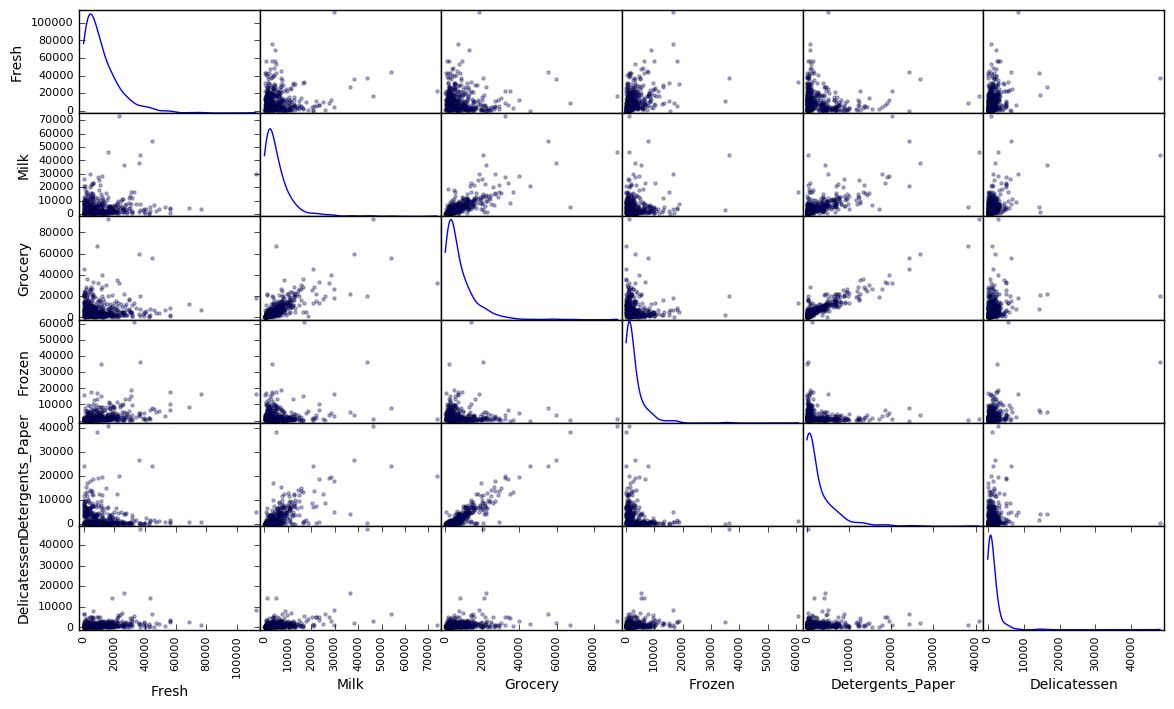

In [8]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:** Detergents/Paper and Grocery appear to exhibit a strong degree of correlation, and confirms our result from Question 2 that Detergents_Paper is a redundant field. Beyond that, Grocery and Milk appear to be somewhat correlated as well.

In general, for all features, the distributions appear to be highly positive-skewed normal distributions (Gaussian-like peaks close to the origin, with long tails extending outward to the right). With the current scale, the data lies close to the orgin and makes it difficult to interpret true correlations through a simple visual manner.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

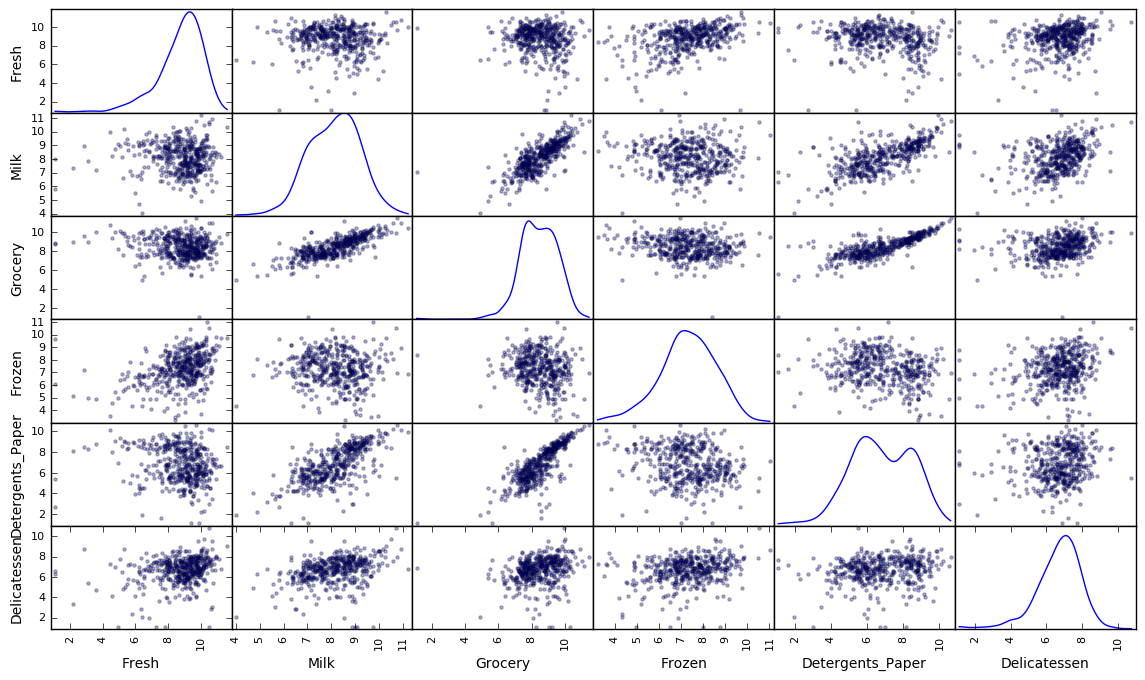

In [9]:
# Scale the data using the natural logarithm
log_data = np.log(data)

# Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [10]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,11.627601,10.296441,9.806316,9.725855,8.506739,9.053687
1,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
2,9.169727,7.182352,7.141245,7.979681,6.734592,5.669881


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [11]:
def find_outlier_indices(data,iqr_factor):
    array = []
    
    for feature in data.keys():
    
        # Calculate Q1 (25th percentile of the data) for the given feature
        Q1 = np.percentile(log_data[feature], 25)

        # Calculate Q3 (75th percentile of the data) for the given feature
        Q3 = np.percentile(log_data[feature], 75)

        # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
        step = iqr_factor*(Q3 - Q1)

        # Find outliers and add to array
        outliers =  log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index.tolist()
        array.append(outliers)

    # return flatten and sorted list of outlier points as numpy array
    return np.sort(np.concatenate(np.array(array)).ravel())

In [12]:
# drop values from an array if it exists
def drop_em_if_you_can(array, drop_val):
    try:
        itemindex = numpy.where(array==drop_val)
        array = numpy.delete(array, itemindex)        
    except:
        pass
    return array

In [13]:
verbose_display = 0

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3 - Q1)
    
    # Turn off lengthy display
    if verbose_display != 0: 
        print "Data points considered outliers for the feature '{}':".format(feature)
        display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
# Select the indices for data points you wish to remove

# Built a function to identify all outliers
outliers  = find_outlier_indices(log_data,1.5)

# Drop outliers from sample points of list, ids = 65, 181, 395
outliers = drop_em_if_you_can(outliers, 65)
outliers = drop_em_if_you_can(outliers, 181)
outliers = drop_em_if_you_can(outliers, 395)

# Output filter results
print str(len(outliers)) + " outliers have been identified (including duplicates): " + str(outliers.tolist())
print "\n - - - - - - - - - - - - - - \n"
unique_outliers = np.unique(outliers).tolist()
print str(len(unique_outliers)) + " UNIQUE outliers have been identified and will be removed: " + str(unique_outliers)

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[unique_outliers]).reset_index(drop = True)

46 outliers have been identified (including duplicates): [38, 57, 66, 66, 75, 75, 81, 86, 95, 96, 98, 109, 128, 128, 137, 142, 145, 154, 154, 154, 161, 171, 175, 183, 184, 187, 193, 203, 218, 233, 264, 285, 289, 304, 305, 325, 338, 343, 353, 355, 356, 357, 412, 420, 429, 439]

 - - - - - - - - - - - - - - 

41 UNIQUE outliers have been identified and will be removed: [38, 57, 66, 75, 81, 86, 95, 96, 98, 109, 128, 137, 142, 145, 154, 161, 171, 175, 183, 184, 187, 193, 203, 218, 233, 264, 285, 289, 304, 305, 325, 338, 343, 353, 355, 356, 357, 412, 420, 429, 439]


In [14]:
# Count collection, and show in descending order 
from collections import Counter
Counter(outliers).most_common

<bound method Counter.most_common of Counter({154: 3, 128: 2, 66: 2, 75: 2, 439: 1, 264: 1, 137: 1, 142: 1, 145: 1, 412: 1, 285: 1, 161: 1, 420: 1, 38: 1, 171: 1, 429: 1, 175: 1, 304: 1, 305: 1, 183: 1, 184: 1, 57: 1, 187: 1, 193: 1, 203: 1, 325: 1, 289: 1, 81: 1, 338: 1, 86: 1, 343: 1, 218: 1, 95: 1, 96: 1, 353: 1, 98: 1, 355: 1, 356: 1, 357: 1, 233: 1, 109: 1})>

### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:** Yes, running a collection over the list, IDs of 66, 75, and 128 all appear twice, and 154 appears three times. While this may suggest that rather than outliers that can be dropped from the dataset, these may represent true edge/corner observations that we are trying to model. _However_, since there are only 4 occurences, relative to the size of our overall dataset (roughly ~1%), we need not be too concerned. 

Additionally, although 41 outliers were identified in total (roughly ~10%), we have decided to remove all outliers from the dataset. Since we've built a function in Q3 that automatically identifies a list of outliers, with an adjustable thresholding based on a multiplier of the IQR, we can always return and decrease the filtered set if desired, i.e., widen the acceptable band for the inclusion of additional data points.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

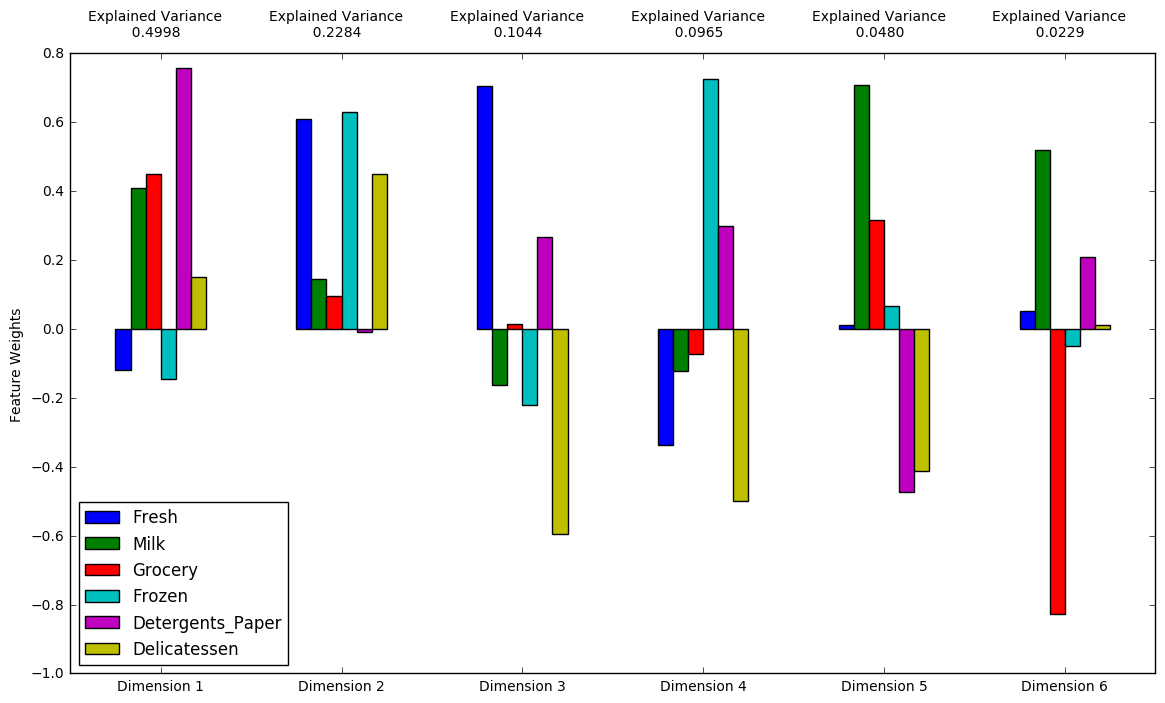

In [31]:
from sklearn.decomposition import PCA

# Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components = good_data.shape[1]).fit(good_data)

# Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:** Approximately 71% of the total variance is explained by the first and second component; adding the third and fourth principal components increses the total variance to 93%.

The first two principal components appear complementary (orthonormal); the first takes strong postive weighted contributions from Milk, Grocery, and Detergents/Paper --- likely a large restaurant (or chain of restaurants), whereas the second uses the remaining three products (Fresh, Frozen, and Delicatessen) --- likely neighborhood grocery market, specializing in homemade family meals. Additionally, while the third strongly weights Fresh and the fourth applies an equivalent weight to Frozen, both the third and fourth components have negatively weighted Delicatessen. 

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [32]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,2.4864,4.5457,0.1793,-0.2166,0.4234,0.3894
1,5.4422,-4.4840,-1.9654,-0.9219,-0.0315,-0.3132
2,-1.2924,-0.2632,0.8454,1.0816,-0.5394,0.5318


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [35]:
# Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components = 2).fit(good_data)

# Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [36]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,2.4864,4.5457
1,5.4422,-4.4840
2,-1.2924,-0.2632


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

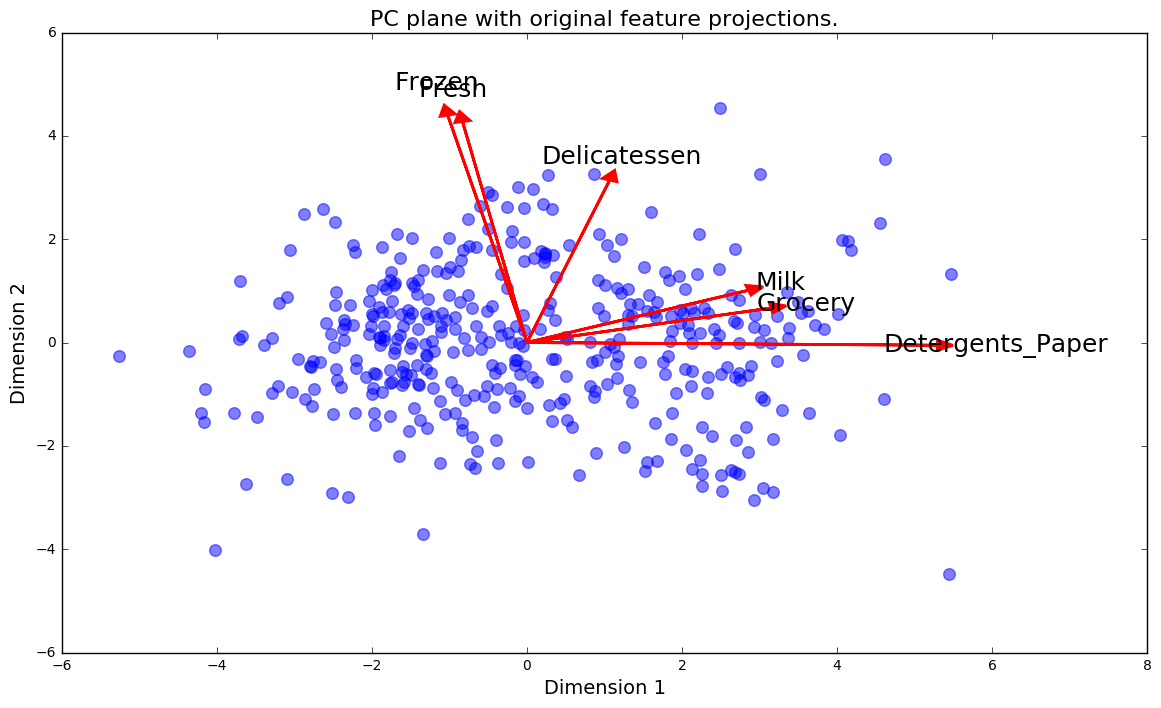

In [37]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

**Answer**: Frozen and Fresh appear to be most correlated with the first component, while Delicatessen, Milk, Grocery, and Detergents/Paper seem to be more correlated with the second.

These observations are somewhat aligned with what was discovered earlier; when running a PCA model with 6 components, Frozen and Fresh (and to a lesser extent Delicatessen) were correlated, while Milk, Grocery, and Detergents/Paper were correlated with one another. From the biplot above, we see that Delicatessen, in a two dimensional space, is mapped within the strong directions denoted by the other two feature groups.

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

At a high level, the scikit-learn [documentation](http://scikit-learn.org/stable/modules/clustering.html#overview-of-clustering-methods) suggests a few points:
- K-means requires user to specify the number of clusters, while Gaussian mixtures requires many more paramters. 
- Scalable performance of Gaussian mixtures is worse than K-means, but it is not a concern with our small dataset.
- K-means is an all-around good method, while Gausian mixtures tend to behave better with specific cases, especially problems involving flat geometry (as we have here) and ideal for density estimation (not the case).

Although the density plots from Q3 appear to demonstrate Gaussian-like distributions, since we are not concerned with computing probabilitistic estimations of likelihood, but rather direct classification, K-Means has been selected going forward.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [38]:
from sklearn import cluster
from sklearn import metrics

n_clusters_array=[2,3,4,5,6,7,8,9,10,11,12]

for n_clusters in n_clusters_array:
    # Apply your clustering algorithm of choice to the reduced data 
    clusterer = cluster.KMeans(n_clusters=n_clusters,random_state=1).fit(reduced_data)

    # Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # Find the cluster centers
    centers = clusterer.cluster_centers_

    # Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # Calculate the mean silhouette coefficient for the number of clusters chosen
    score = metrics.silhouette_score(reduced_data, clusterer.labels_, metric='euclidean')
    print "Silhouette score = ", '{0:.3f}'.format(score), "for ", n_clusters,"clusters"

Silhouette score =  0.447 for  2 clusters
Silhouette score =  0.359 for  3 clusters
Silhouette score =  0.329 for  4 clusters
Silhouette score =  0.354 for  5 clusters
Silhouette score =  0.363 for  6 clusters
Silhouette score =  0.353 for  7 clusters
Silhouette score =  0.373 for  8 clusters
Silhouette score =  0.363 for  9 clusters
Silhouette score =  0.347 for  10 clusters
Silhouette score =  0.352 for  11 clusters
Silhouette score =  0.361 for  12 clusters


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:** Scores are shown above. Two clusters is ideal, as it generally trends downward thereafter. 

In [39]:
n_clusters_opt = 2

# Apply your clustering algorithm of choice to the reduced data 
clusterer = cluster.KMeans(n_clusters=n_clusters_opt,random_state=1).fit(reduced_data)

# Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# Find the cluster centers
centers = clusterer.cluster_centers_

# Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

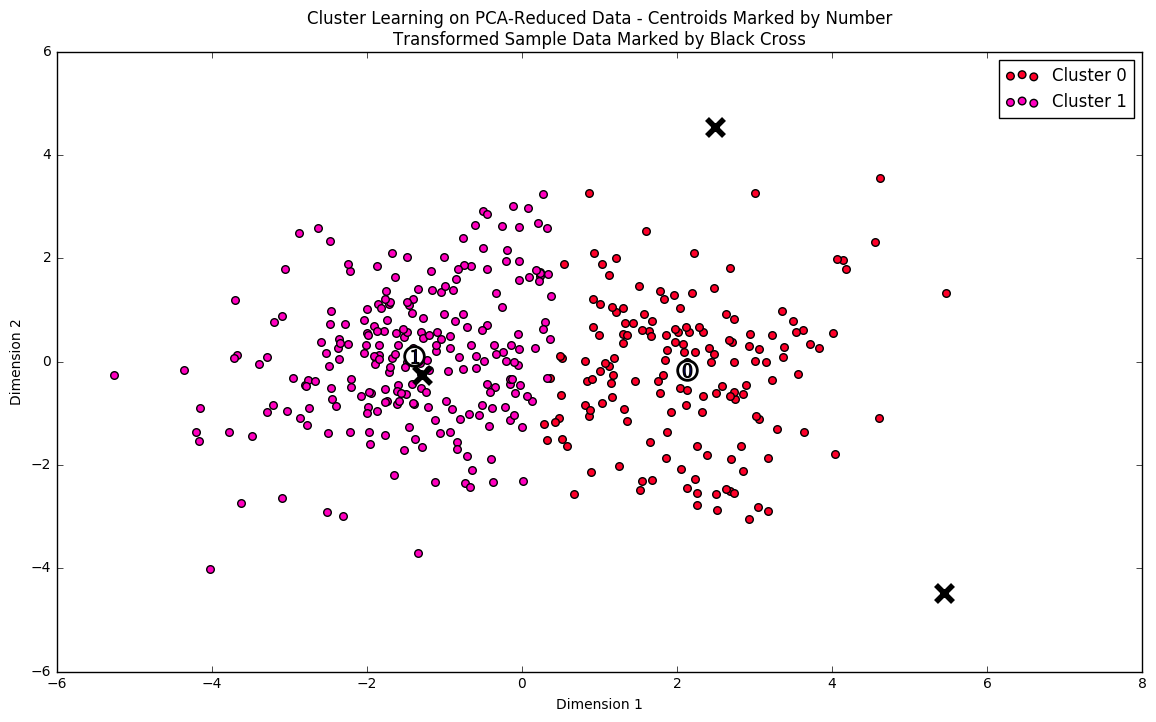

In [40]:
# Apply your clustering algorithm of choice to the reduced data 
clusterer = cluster.KMeans(n_clusters=2,random_state=1).fit(reduced_data)

# Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# Find the cluster centers
centers = clusterer.cluster_centers_

# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [41]:
# Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,5240.0,7884.0,11710.0,1097.0,4502.0,1154.0
Segment 1,9480.0,1940.0,2455.0,2196.0,310.0,765.0


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**
Segment 0 most closely aligns with dimension 1 from the previous PCA work, e.g., both groups buy large quantities of Milk, Grocery, and Detergents/Paper, likely reflect restaurants, or similar establishments with high throughput (lots of cream/butter/milk and grocery items for fresh dishes, and no need for frozen items).

Segment 1 most closely aligns with dimension 2 from the previous PCA work, e.g., both groups buy large quantities of Fresh and Frozen, and could reflect small supermarkets, or similar establishments that support residential customers (families) with lower throughout (higher need for Frozen, higher needs for Fresh).

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [42]:
samples

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,112151,29627,18148,16745,4948,8550
1,85,20959,45828,36,24231,1423
2,9602,1316,1263,2921,841,290


In [43]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


**Answer:**

Sample 0 (id=181) purchases a (relatively) massive amount of Fresh and Frozen; according to the classifcation from Q8, this reflects Segment 1, which was predicted correctly.

Sample 1 (id=65) purchases a (relatively) massive amount of Milk, Grocery, and Detergents/Paper; according to the classification from Q8, this reflects Segment 0, which was correctly predicted.

Samnple 2 (id=395) purchases a (relatively) massive amount of Fresh and relatively large amount of Frozen; according to the classifcation from Q8, this reflects Segment 1, which was predicted correctly.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:** Although this appears to be a benign question regarding the delivery of wholesale food/grocery items, having subject matter knowledge would help. First, it'd be ideal to know the general customer sentiment, e.g., degree of effort to support deliveries, availability of additional capacity to support larger deliveries. We can obviously hypothesize about _how_ the customer's order, e.g., Milk v. Fresh, may correlate with tendancies to be more or less supportive of a delivery schedule change, but without the additional information, we cannot make an informative decision. Bearing that in mind, we can proceed with the only information currently available, i.e., customer segmetation by product type. 

Slowing down the delivery schedule will impact the clusters differently, and may be detremental to both but in different ways:
- Cluster 1, which may be restaurants in high need of Milk, Grocery, and Detergents/Paper, _might_ be able to cope with a reduced delivery, assuming they are not capacity limited. Furthermore, this assumes that these kinds of goods will _not_ spoil if held longer than a day (a reasonable assumption).
- Cluster 0, which may be smaller corner stores serving a residential community, may be hit harder. Their heavy demands of produce may lead to shortages with their customer, greatly limiting their ability to provide fresh fruit and vegetables daily. While the frozen items may pose a smaller burden, if these corner stores do not have the additional freezer capacity to hold days of items, they might be at risk of running out of frozen products.

Regarding logistics, a possible solution to understand customer impact might include pilot testing of reduced delivery schedules two both customer segments. Recommendation would be to change the delivery schedule for a random 10% sample of each population (10% of Cluster 0, 10% of Cluster 1) and run separate tests on both groups, while carefullly monitoring revenue and customer feedback. Based on this data, the distributor could make data-informed decisions that would likely have desireable outcomes.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:** Yes, with estimated category expenditures from the ten new customers, our wholesale distributor could classify (label) each into either segment (0 or 1). Rerunning the classification algorithm (one that we've already trained) would be the simpliest process of labeling the unlabeled data.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

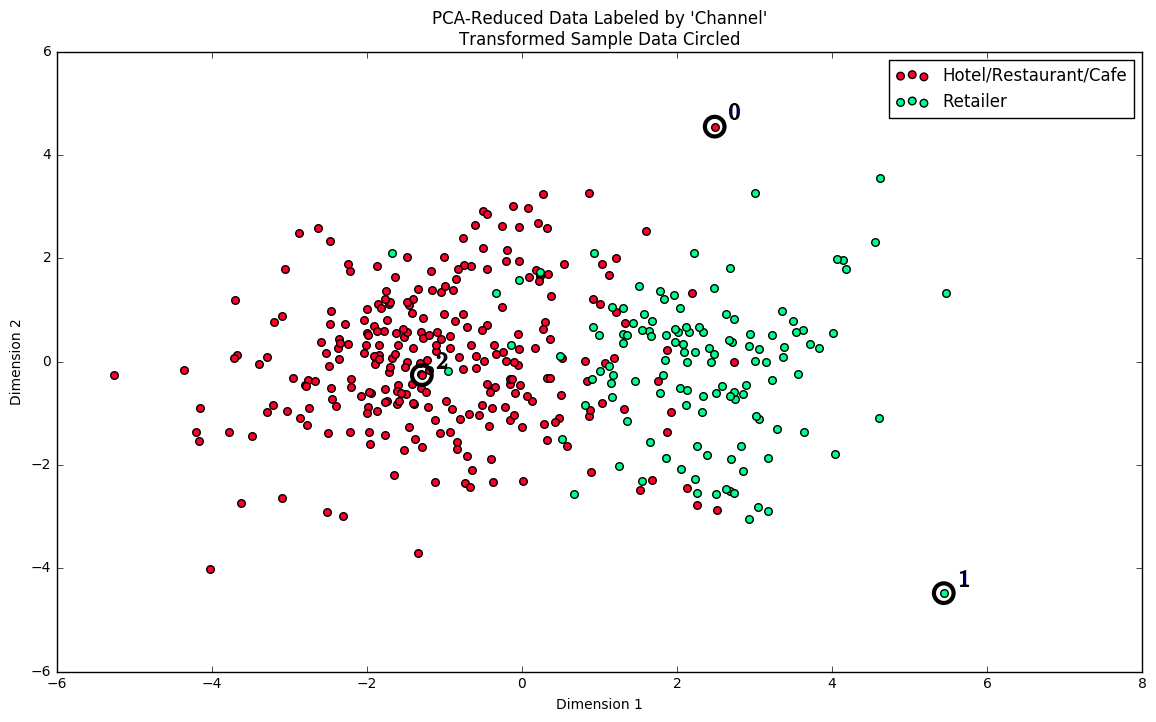

In [44]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:** Comparing this with the previous PCA-Reduced plot, the K-means clustering algorithm with two clusters does a great job reconstructing the original labels produced by the 'channel' data. However, this new labeled information demonstrates that the types (segment 0 and 1) are not as cleanly separable as our K-Means algorithm with PCA-Reduced data would have suggested. Although not exact, this _model_ is quite consistent with actual insight provided by the channel information - in other words, quite good! 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.